In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['pituitary_tumor','no_tumor','meningioma_tumor','glioma_tumor']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [7]:
def load_data():
    datasets = [r"D:\Projects\HealthPulse  Data Driven strategies for Healthcare Optimization\Brain Tumor\Training", r"D:\Projects\HealthPulse  Data Driven strategies for Healthcare Optimization\Brain Tumor\Testing"]
    
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                    
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [8]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading D:\Projects\HealthPulse  Data Driven strategies for Healthcare Optimization\Brain Tumor\Training


100%|████████████████████████████████████████████████████████████████████████████████| 827/827 [00:19<00:00, 42.95it/s]


Loading D:\Projects\HealthPulse  Data Driven strategies for Healthcare Optimization\Brain Tumor\Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 33.23it/s]


In [9]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [10]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2870
Number of testing examples: 394
Each image is of size: (150, 150)


In [11]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
18/18 [==============================] - 40s 2s/step - loss: 1.3888 - accuracy: 0.4534 - val_loss: 0.9132 - val_accuracy: 0.6045
Epoch 2/10
18/18 [==============================] - 35s 2s/step - loss: 0.7275 - accuracy: 0.7030 - val_loss: 0.7524 - val_accuracy: 0.6516
Epoch 3/10
18/18 [==============================] - 35s 2s/step - loss: 0.4790 - accuracy: 0.8127 - val_loss: 0.6083 - val_accuracy: 0.7927
Epoch 4/10
18/18 [==============================] - 33s 2s/step - loss: 0.3100 - accuracy: 0.8937 - val_loss: 0.5187 - val_accuracy: 0.8449
Epoch 5/10
18/18 [==============================] - 34s 2s/step - loss: 0.2104 - accuracy: 0.9316 - val_loss: 0.4605 - val_accuracy: 0.8606
Epoch 6/10
18/18 [==============================] - 35s 2s/step - loss: 0.1307 - accuracy: 0.9652 - val_loss: 0.4421 - val_accuracy: 0.8624
Epoch 7/10
18/18 [==============================] - 36s 2s/step - loss: 0.0733 - accuracy: 0.9843 - val_loss: 0.4033 - val_accuracy: 0.8833
Epoch 8/10
18/18 [==

In [16]:
test_loss = model.evaluate(test_images, test_labels)

13/13 [==============================] - 1s 97ms/step - loss: 3.9444 - accuracy: 0.7259


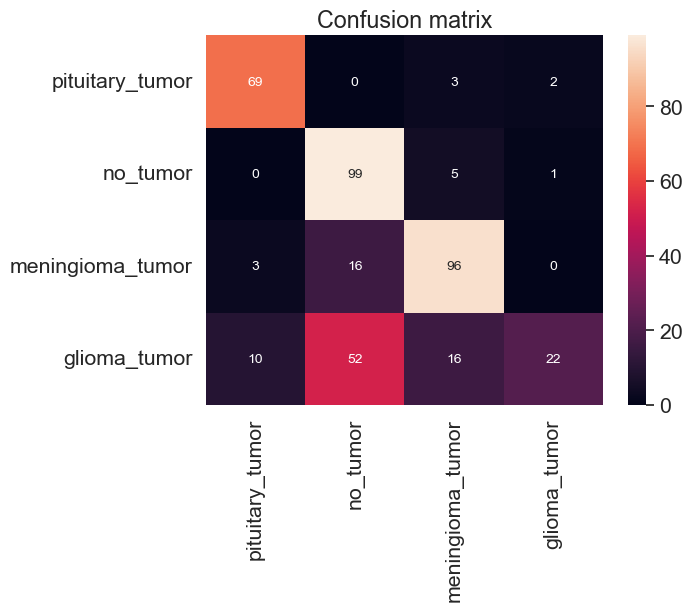

In [18]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [18]:
model_json=model.to_json()
with open("model_tumor.json", "w") as json_file:
    json_file.write(model_json)

In [1]:
import joblib

In [ ]:
model.save_weights("model_kidney_scan.h5")